In [1]:
#Load Dataset
import pandas as pd
df = pd.read_csv("C:/Users/Lenovo/Downloads/diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [2]:
# Mengganti kolom readmitted dengan "YES" dan "NO"
df['readmitted'] = df['readmitted'].replace({'>30': 'NO', '<30': 'YES'})

In [3]:
#Mengganti "?" pada dataset menjadi NA
df.replace("?", pd.NA, inplace=True)

In [4]:
#Menghitung presentase missing value
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

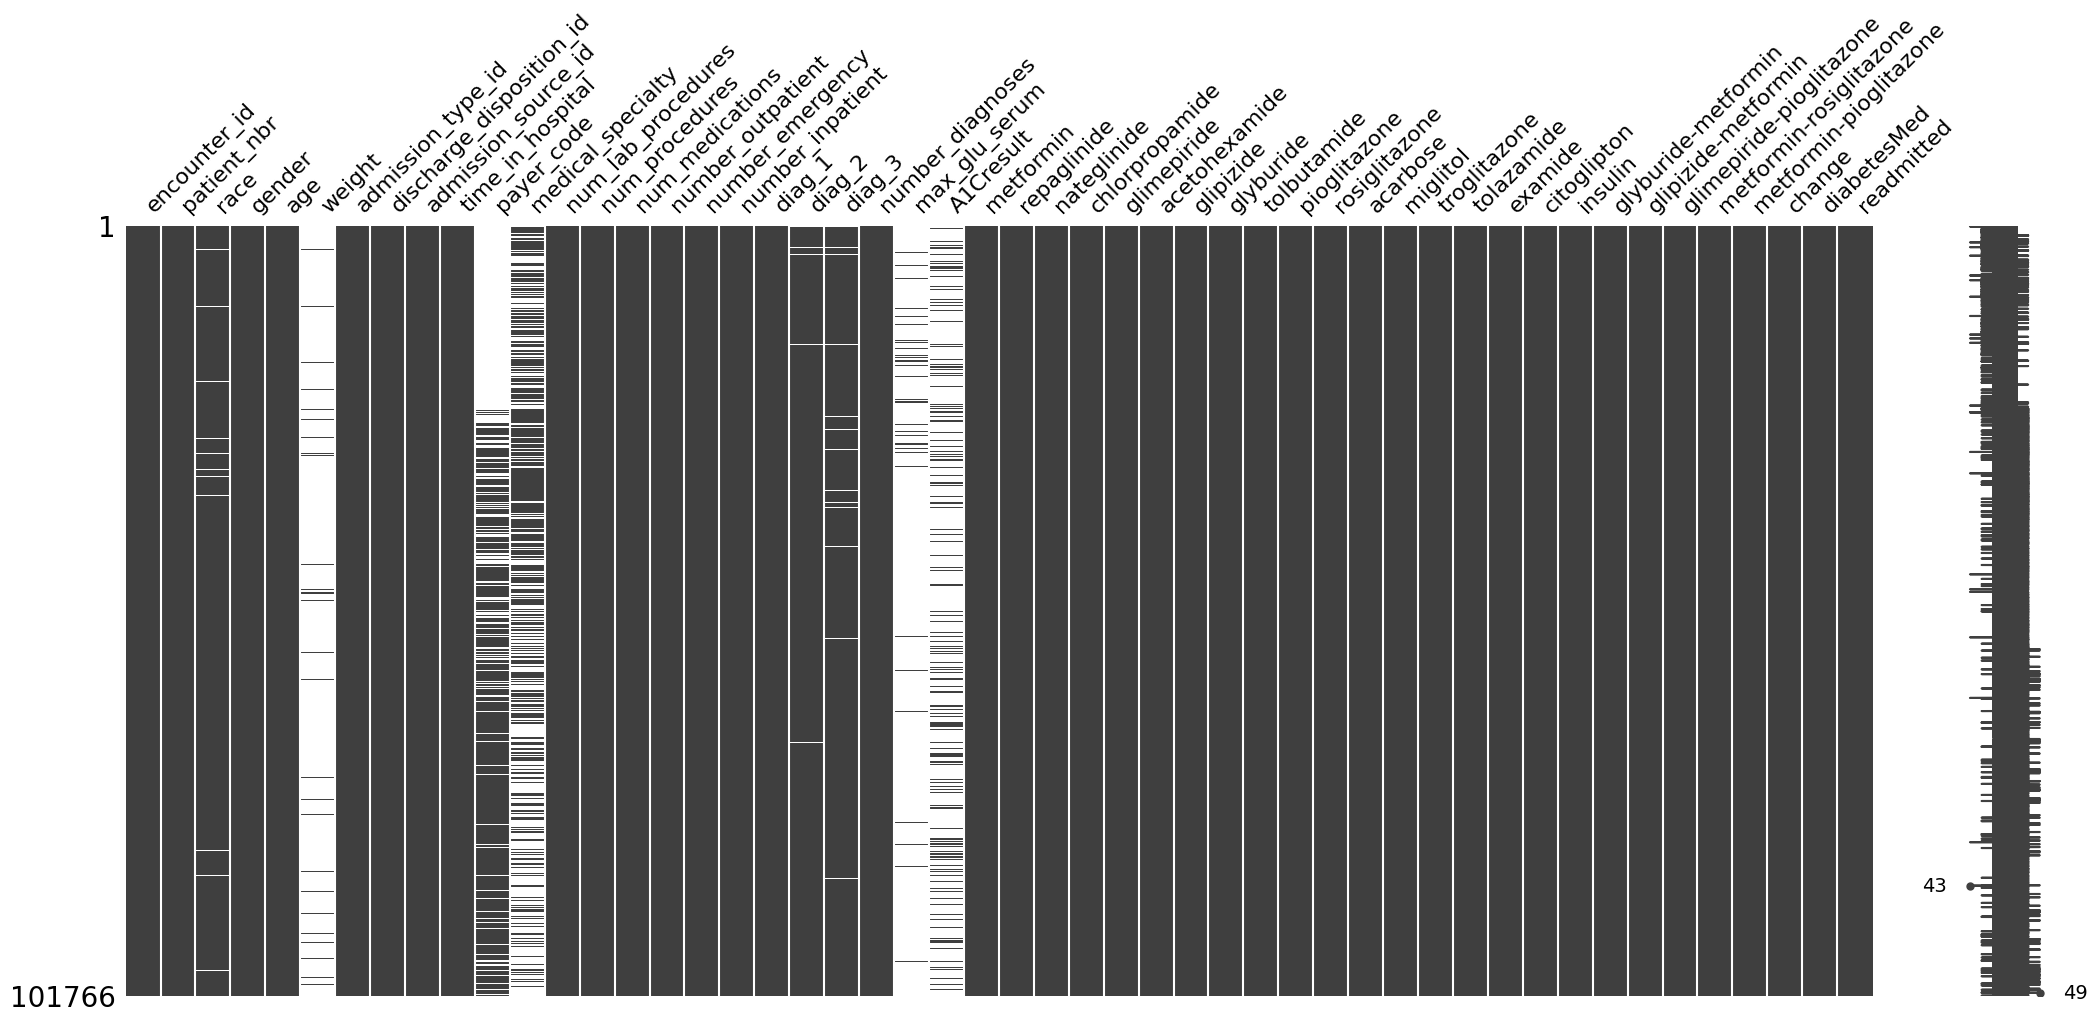

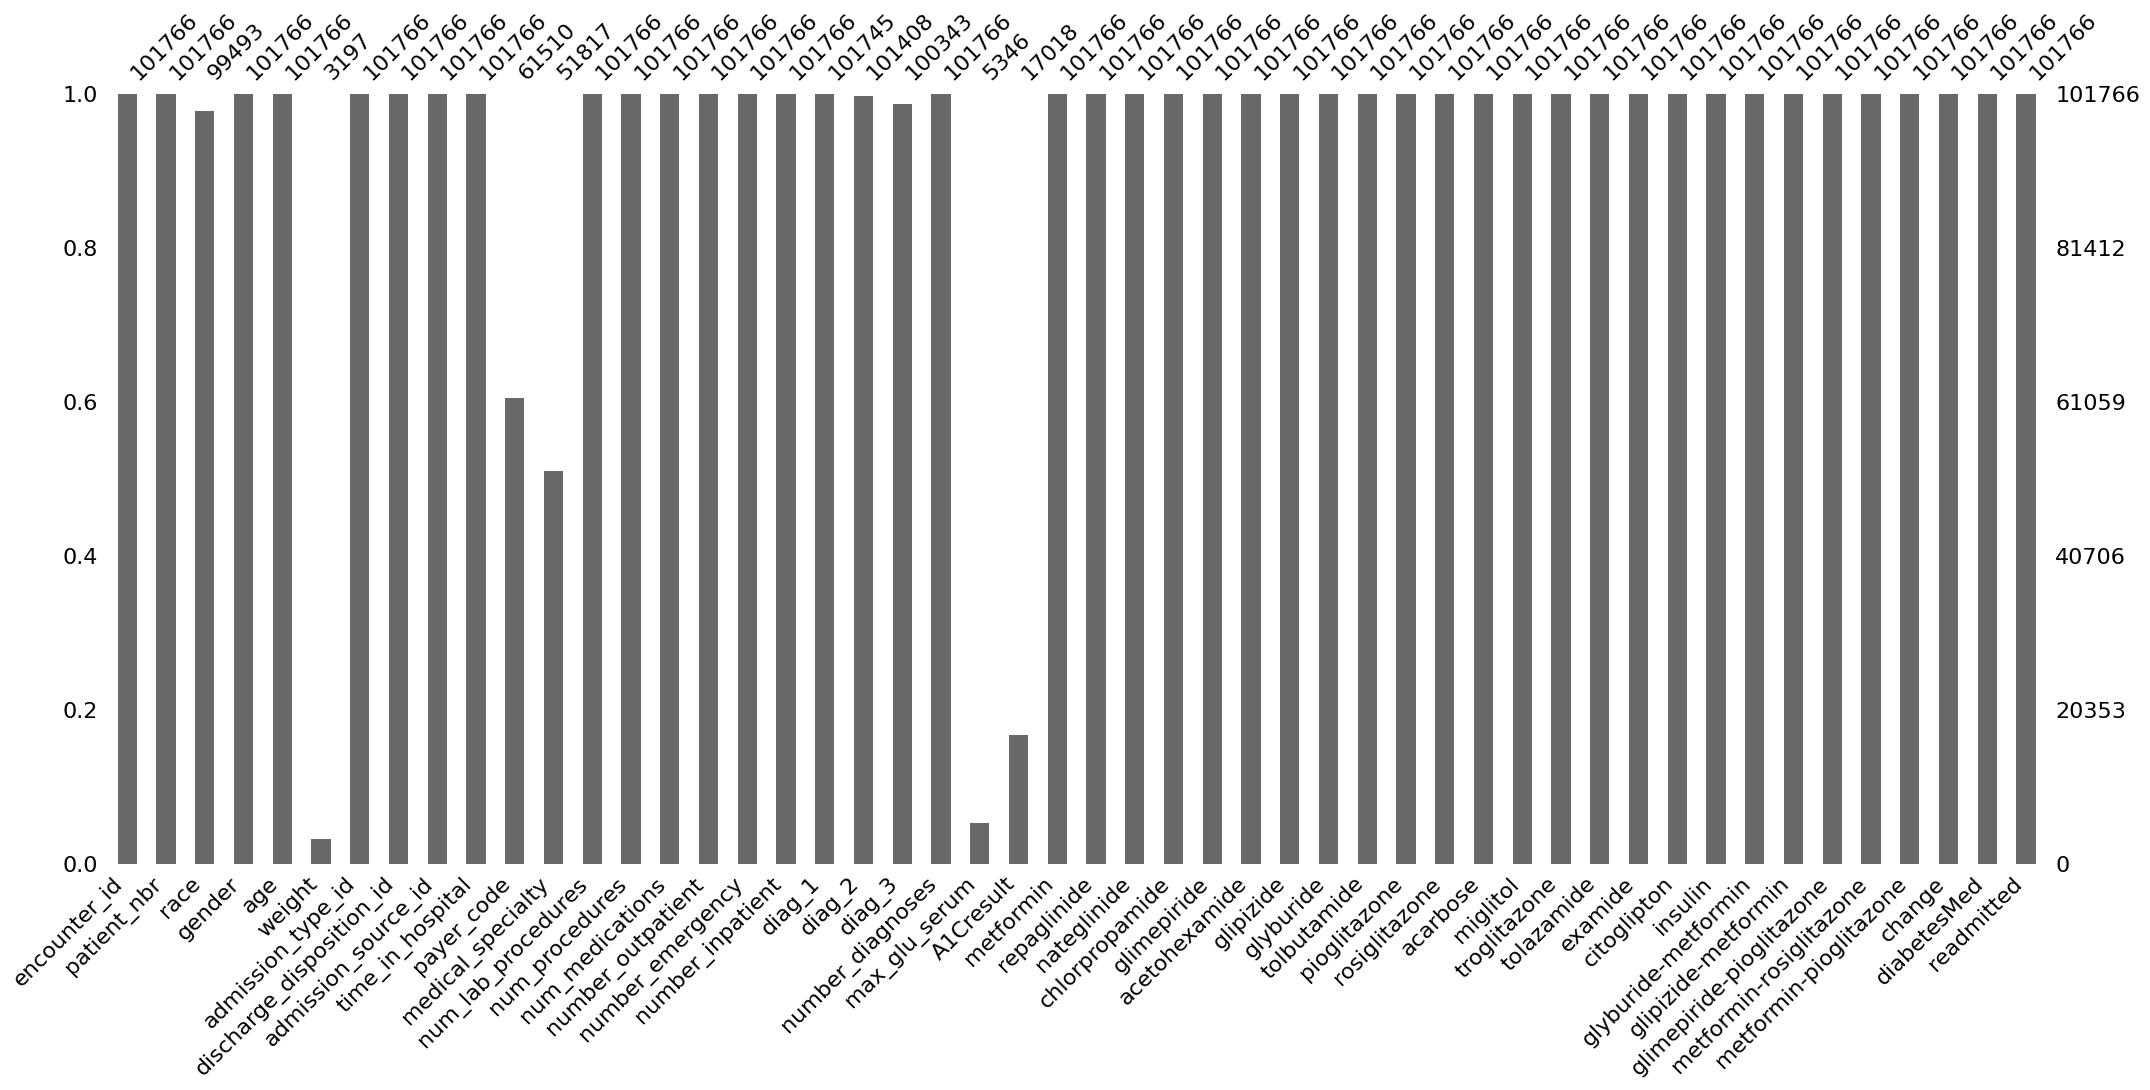

In [5]:
#Visualisasi sebaran missing value
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

In [6]:
#Menghapus variabel yang presentase missing value nya lebih dari 35%
df.drop(columns = ['weight'],axis = 1, inplace = True)
df.drop(columns = ['payer_code'],axis = 1, inplace = True)
df.drop(columns = ['medical_specialty'],axis = 1, inplace = True)
df.drop(columns = ['max_glu_serum'],axis = 1, inplace = True)
df.drop(columns = ['A1Cresult'],axis = 1, inplace = True)

In [7]:
#Imputasi missing value variabel kategorik dengan modus dari setiap kelas kategori
def fill_na_by_mode(df, column, reference):
    # Hitung modus dari setiap kategori di kolom column berdasarkan kategori di kolom reference
    mode_per_reference = df.groupby(reference)[column].apply(lambda x: x.mode()[0])

    # Fungsi untuk mengisi nilai NA di kolom column berdasarkan kategori di kolom reference
    def fill_na(row):
        if pd.isna(row[column]):
            return mode_per_reference[row[reference]]
        else:
            return row[column]

    # Mengisi nilai NA di kolom column berdasarkan kategori di kolom reference
    df[column] = df.apply(fill_na, axis=1)

    return df

# Contoh penggunaan fungsi untuk mengisi nilai NA di kolom "gender" berdasarkan kategori di kolom "readmitted"
df = fill_na_by_mode(df, 'gender', 'readmitted')
df = fill_na_by_mode(df, 'race', 'readmitted')
df = fill_na_by_mode(df, 'diag_1', 'readmitted')
df = fill_na_by_mode(df, 'diag_2', 'readmitted')
df = fill_na_by_mode(df, 'diag_3', 'readmitted')

In [8]:
#Menyederhanakan kategori diag_1 dan menjadikan diag_1 menjadi simplified_diag_1
#Menyederhanakan kategori diag_2 dan menjadikan diag_2 menjadi simplified_diag_2
#Menyederhanakan kategori diag_3 dan menjadikan diag_3 menjadi simplified_diag_3


# Fungsi untuk mengkategorikan diagnosis
def categorize_diagnosis(diag):
    if 'V' in diag or 'E' in diag:
        return 'Other'
    elif '250' in diag:
        return 'Diabetes'
    else:
        try:
            diag_int = int(diag)
            if 390 <= diag_int <= 459 or diag_int == 785:
                return 'Circulatory'
            elif 460 <= diag_int <= 519 or diag_int == 786:
                return 'Respiratory'
            elif 520 <= diag_int <= 579 or diag_int == 787:
                return 'Digestive'
            elif 580 <= diag_int <= 629 or diag_int == 788:
                return 'Genitourinary'
            elif 140 <= diag_int <= 239:
                return 'Neoplasms'
            elif 710 <= diag_int <= 739:
                return 'Musculoskeletal'
            elif 800 <= diag_int <= 999:
                return 'Injury'
            else:
                return 'Other'
        except ValueError:
            return 'Other'

df['simplified_diag_1'] = df['diag_1'].apply(categorize_diagnosis)
df['simplified_diag_2'] = df['diag_2'].apply(categorize_diagnosis)
df['simplified_diag_3'] = df['diag_3'].apply(categorize_diagnosis)

In [9]:
#menghapus kolom diag_1 diag_2 diag_3 karena sudah digantikan dengan primary diagnosis
df.drop(columns=['diag_1'], inplace=True)
df.drop(columns=['diag_2'], inplace=True)
df.drop(columns=['diag_3'], inplace=True)

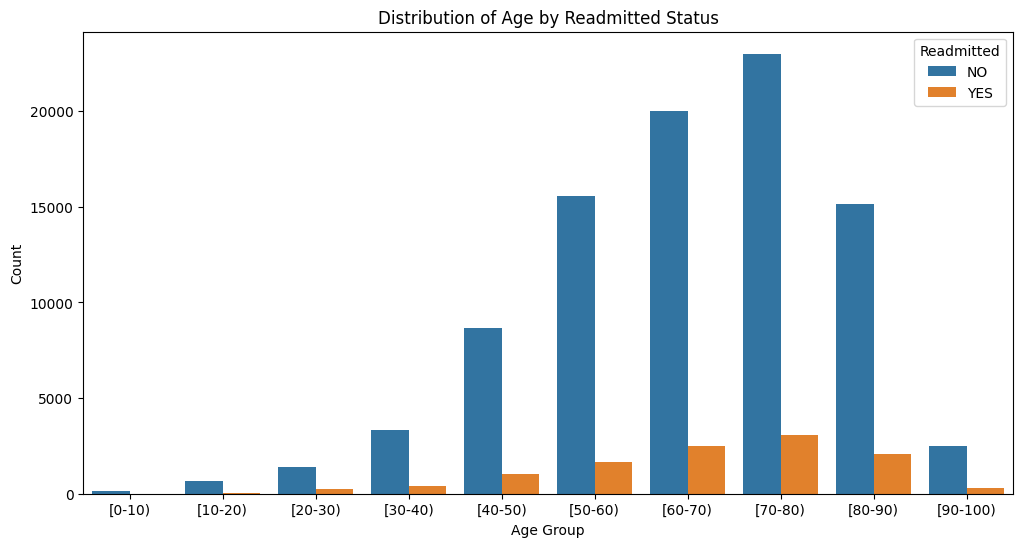

In [10]:
import seaborn as sns
#melihat persebaran age disetiap kategori
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='readmitted')
plt.title('Distribution of Age by Readmitted Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

In [11]:
# menyederhankan kategori age menjadi dibawah 50 dan diatas 50
def categorize_age(age):
    if age in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)']:
        return 'Dibawah 50'
    else:
        return 'Diatas 50'

# Menambahkan kolom age_group dan menghapus kolom age
df['age_group'] = df['age'].apply(categorize_age)
df.drop(columns=['age'], inplace=True)

In [12]:
#drop kolom encounter_id dan patient_nbr karena tidak akan digunakan dalam modelling
df.drop(columns=['encounter_id'], inplace=True)
df.drop(columns=['patient_nbr'], inplace=True)

In [13]:
#melakukan label encoding pada kolom kategorik
from sklearn.preprocessing import LabelEncoder
object_data = df.select_dtypes(include=['object']).copy()
numeric_data = df.select_dtypes(include=['number']).copy()

# Menggunakan Label Encoder untuk data objek
le = LabelEncoder()
for col in object_data.columns:
    object_data[col] = le.fit_transform(object_data[col])

# Menggabungkan data objek dan numerik
processed_data = pd.concat([numeric_data, object_data], axis=1)

## Coba Modelling

In [14]:
X = processed_data.drop(['readmitted'],axis=1)
y = processed_data['readmitted']

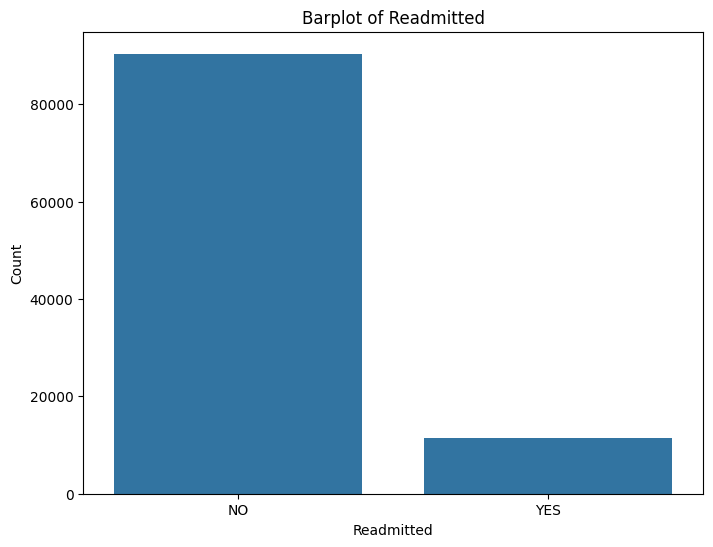

In [15]:
# Hitung jumlah nilai "yes" dan "no" dalam kolom "readmitted"
readmitted_counts = df['readmitted'].value_counts()

# Plot barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=readmitted_counts.index, y=readmitted_counts.values)
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Barplot of Readmitted')
plt.show()

In [16]:
#balancing data dengan smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Lakukan oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)


In [17]:
#splitting data train test
import pandas as pd
import sklearn.neural_network as ann
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X_resampled,y_resampled,test_size=0.2)


In [18]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [20]:
#mencoba pemodelan menggunkan ANN MLP Classifier
mlp = ann.MLPClassifier(hidden_layer_sizes=(3), max_iter=5)
mlp.fit(X_train, y_train)
y_prediksi = mlp.predict(X_test)
import sklearn.metrics as met
print(met.classification_report(y_test,y_prediksi))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72     18110
           1       0.71      0.75      0.73     18054

    accuracy                           0.72     36164
   macro avg       0.73      0.72      0.72     36164
weighted avg       0.73      0.72      0.72     36164



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
#mencoba pemodelan menggunkan XGBoost
xg = XGBClassifier(random_state = 42)
xg.fit(X_train, y_train)
y_prediksi = xg.predict(X_test)
import sklearn.metrics as met
print(met.classification_report(y_test,y_prediksi))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86     18110
           1       0.89      0.81      0.85     18054

    accuracy                           0.85     36164
   macro avg       0.86      0.85      0.85     36164
weighted avg       0.86      0.85      0.85     36164



In [24]:
#Early stopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import callbacks
from keras.optimizers import Adam

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 42))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5462 - loss: 0.6844 - val_accuracy: 0.6888 - val_loss: 0.6156
Epoch 2/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6864 - loss: 0.6215 - val_accuracy: 0.6980 - val_loss: 0.5974
Epoch 3/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7075 - loss: 0.5992 - val_accuracy: 0.7155 - val_loss: 0.5720
Epoch 4/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7159 - loss: 0.5854 - val_accuracy: 0.7240 - val_loss: 0.5613
Epoch 5/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7196 - loss: 0.5769 - val_accuracy: 0.7155 - val_loss: 0.5612
Epoch 6/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7180 - loss: 0.5739 - val_accuracy: 0.7290 - val_loss: 0.5490
Epoch 7/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7234 - loss: 0.5657 - val_accuracy: 0.7317 - val_loss: 0.5457
Epoch 8/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7257 - loss: 0

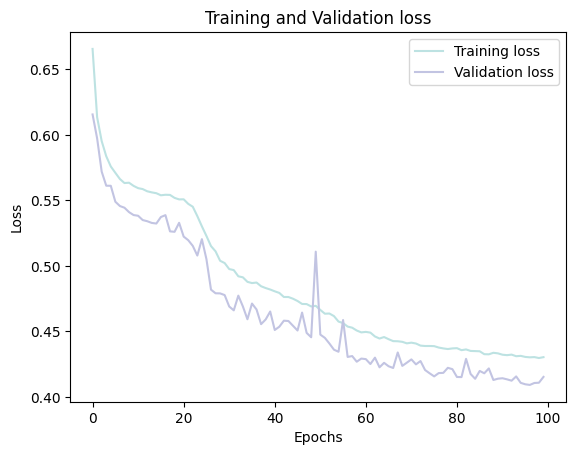

In [25]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

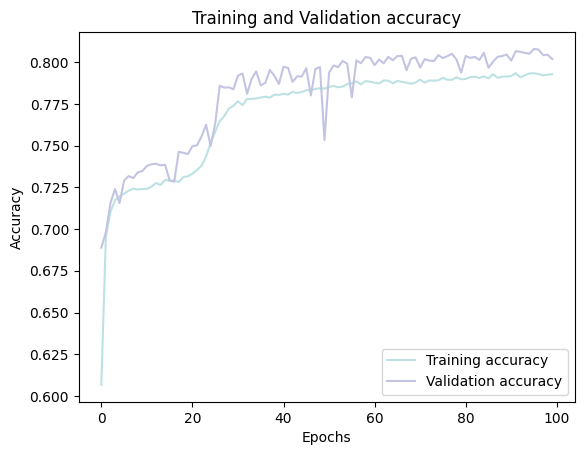

In [26]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Predicting the test set results
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

1131/1131 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     18079
           1       0.82      0.78      0.80     18085

    accuracy                           0.80     36164
   macro avg       0.81      0.80      0.80     36164
weighted avg       0.81      0.80      0.80     36164



In [27]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.1 MB/s eta 0:00:00


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5322 - loss: 0.6864 - val_accuracy: 0.6805 - val_loss: 0.6160
Epoch 2/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6775 - loss: 0.6227 - val_accuracy: 0.7043 - val_loss: 0.5872
Epoch 3/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6995 - loss: 0.6037 - val_accuracy: 0.7143 - val_loss: 0.5718
Epoch 4/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7082 - loss: 0.5932 - val_accuracy: 0.7237 - val_loss: 0.5638
Epoch 5/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7165 - loss: 0.5844 - val_accuracy: 0.7243 - val_loss: 0.5606
Epoch 6/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7226 - loss: 0.5774 - val_accuracy: 0.7310 - val_loss: 0.5490
Epoch 7/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7209 - loss: 0.5736 - val_accuracy: 0.7400 - val_loss: 0.5436
Epoch 8/100
3617/3617 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7259 - loss: 0

<Figure size 800x600 with 0 Axes>

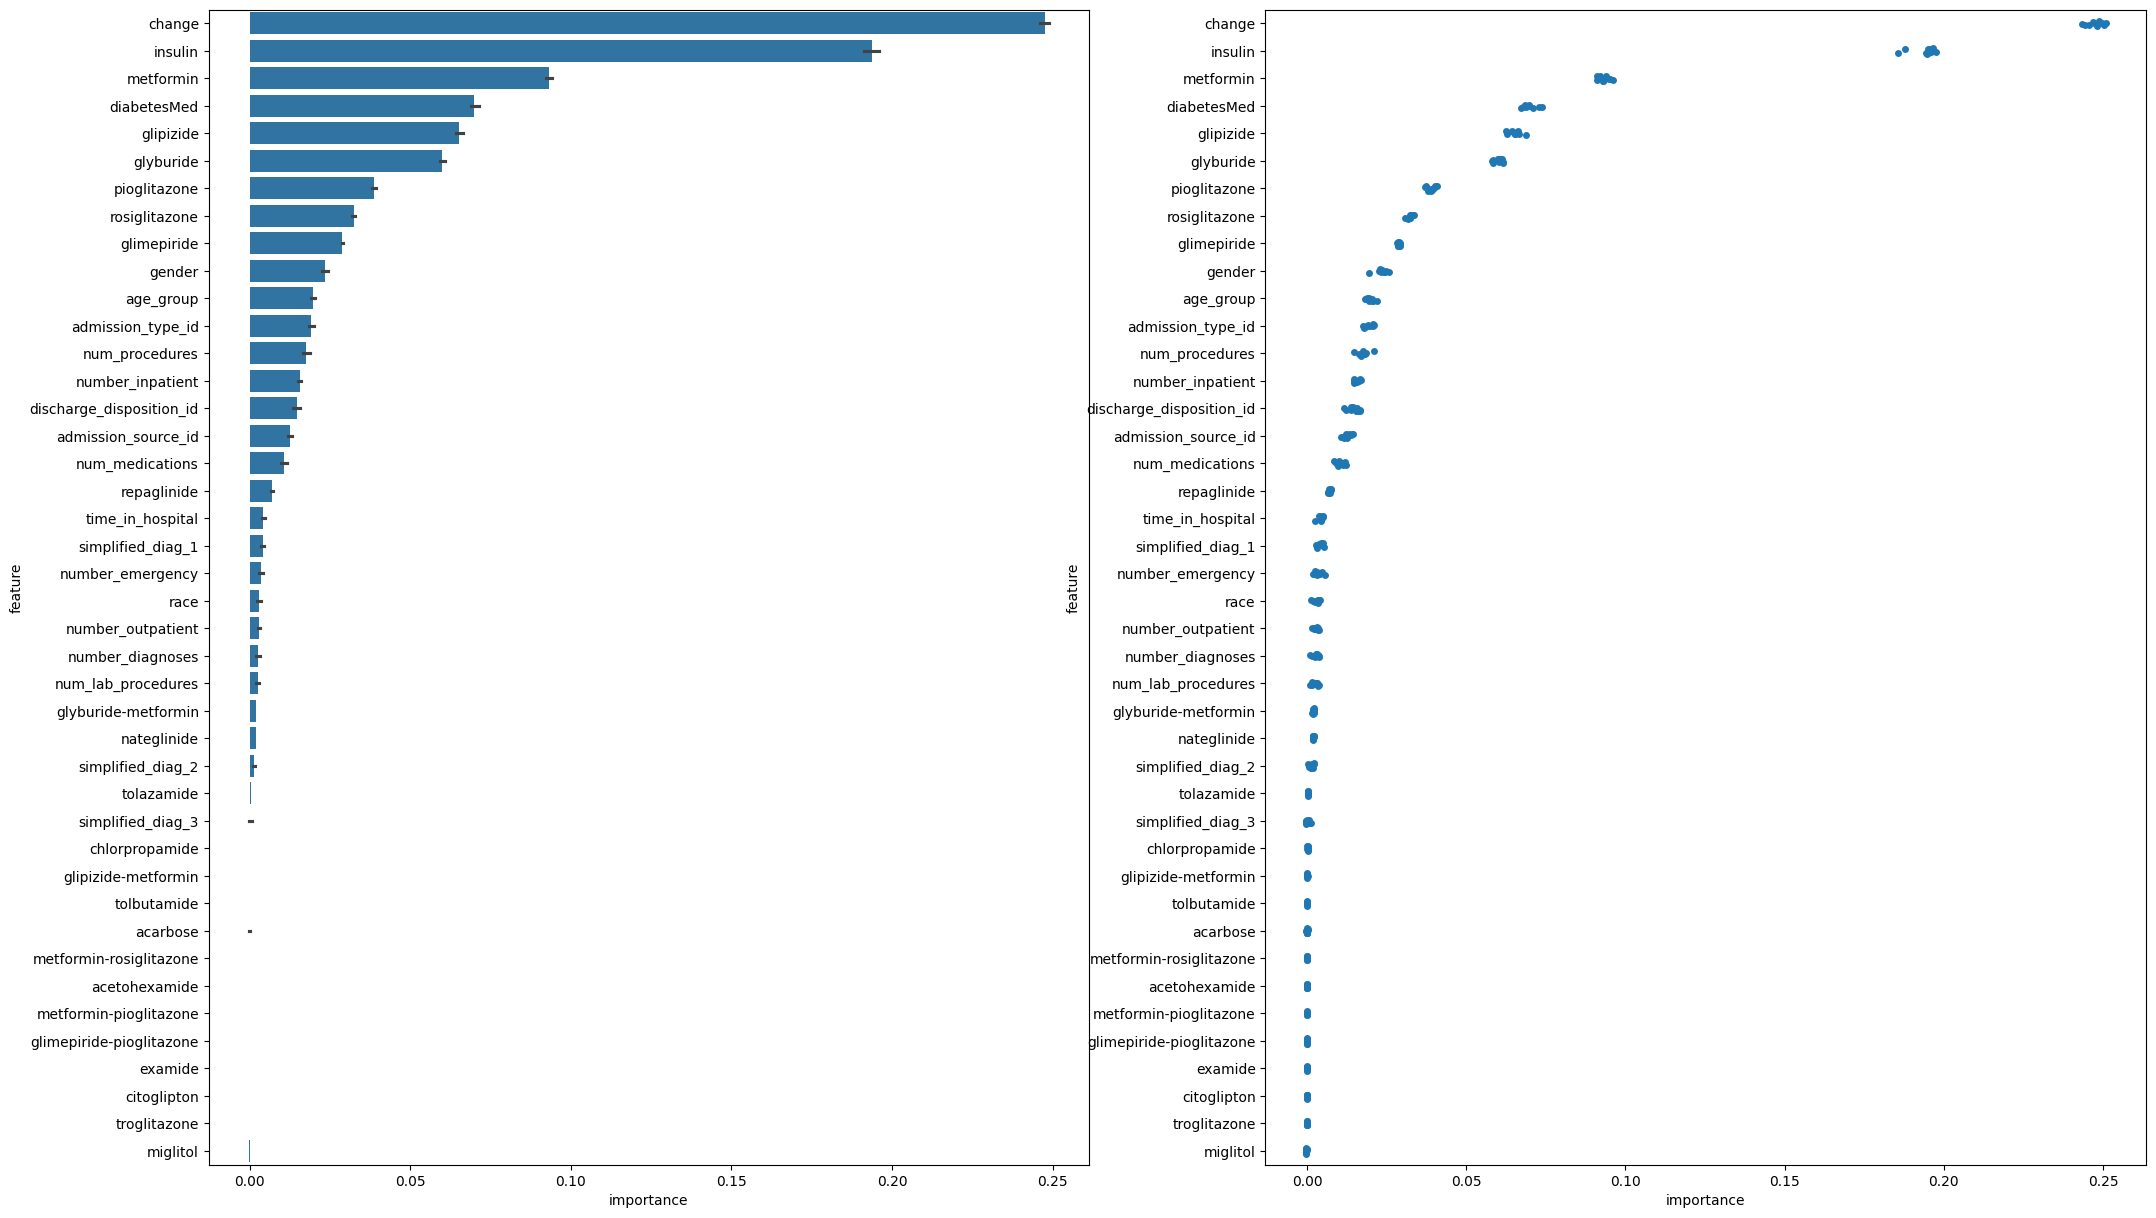

,importance
feature,
change,0.247475
insulin,0.193773
metformin,0.093300
diabetesMed,0.069911
glipizide,0.065289
glyburide,0.060051
pioglitazone,0.038751
rosiglitazone,0.032435
glimepiride,0.028877


In [22]:
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import callbacks
from keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, batch_size=32, epochs=100, callbacks=[early_stopping], validation_split=0.2)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

def plot_fi(model, X, y):
    # Compute permutation importance
    perm = permutation_importance(model, X, y, n_repeats=10, random_state=0, n_jobs=-1)

    # Organize permutation importance results into a DataFrame
    perm2 = pd.DataFrame({'feature': X.columns.tolist()*10, 'importance': perm["importances"].transpose().reshape(-1)})
    perm2["importance"] = perm2.importance/perm2.importance.sum()*10
    urut = perm2.groupby("feature").mean().sort_values("importance", ascending=False)

    # Plotting
    plt.figure(figsize=(8, 6))
    fig, axs = plt.subplots(1, 2, figsize=(25, 15))

    sns.barplot(x='importance', y='feature', data=perm2, order=urut.index, ax=axs[0])
    sns.stripplot(x='importance', y='feature', data=perm2, order=urut.index, s=5, ax=axs[1])
    plt.show()

    return urut

# Load and preprocess dataset (assuming this is already done)
# ...

# Build and compile the neural network
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)
model = Sequential()
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Wrap the Keras model
wrapped_model = KerasClassifierWrapper(model)

# Train the wrapped model
wrapped_model.fit(X_train, y_train)

# Use the plot_fi function to display feature importance
plot_fi(wrapped_model, X_test, y_test)


